In [970]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [971]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [972]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip3 install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [973]:
import pandas as pd
import numpy as np
import json
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
import contractions
import spacy
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


def data_pre(input_data):
    punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    
    with open(input_data, "r", encoding="utf-8") as f:
        d = json.load(f)

    metadata = ['article_url', 'comment_count']
    df = pd.json_normalize(d['articles'], 'comments', metadata)

    data = df.loc[:,['commentID','userID','commentBody','approveDate','recommendations',
                     'replyCount','editorsSelection','article_url','comment_count']]
    
    expanded_text = data['commentBody'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
    data['commentBody'] = expanded_text
    data["commentBody"] = data["commentBody"].str.lower().str.translate(str.maketrans("", "", punc))

    splits = df['article_url'].str.split("/")
    dates = splits.str[-5] + "/" + splits.str[-4] + "/" + splits.str[-3]
    sections = splits.str[-2]
    titles = [' '.join(j) for j in [i.split('-') for i in [sub[: -5] for sub in splits.str[-1]]]]
    output = pd.DataFrame({"Date": dates, "Section": sections, "Title": titles})
    
    return pd.concat([data, output], axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Concatenating Various Data Files

In [974]:
def concat_data(year, month):
  data_1=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_1.json')
  data_2=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_2.json')
  data_3=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_3.json')
  data_4=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_4.json')
  data_5=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_5.json')
  data_6=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_6.json')
  data_7=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_7.json')
  data_8=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_8.json')
  data_9=data_pre('/content/drive/MyDrive/STAT427/'+str(year)+'/0'+str(month)+'/'+str(month)+'_9.json')
  data_all = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9], axis=0)
  return data_all

  
data1= concat_data(2014,12)

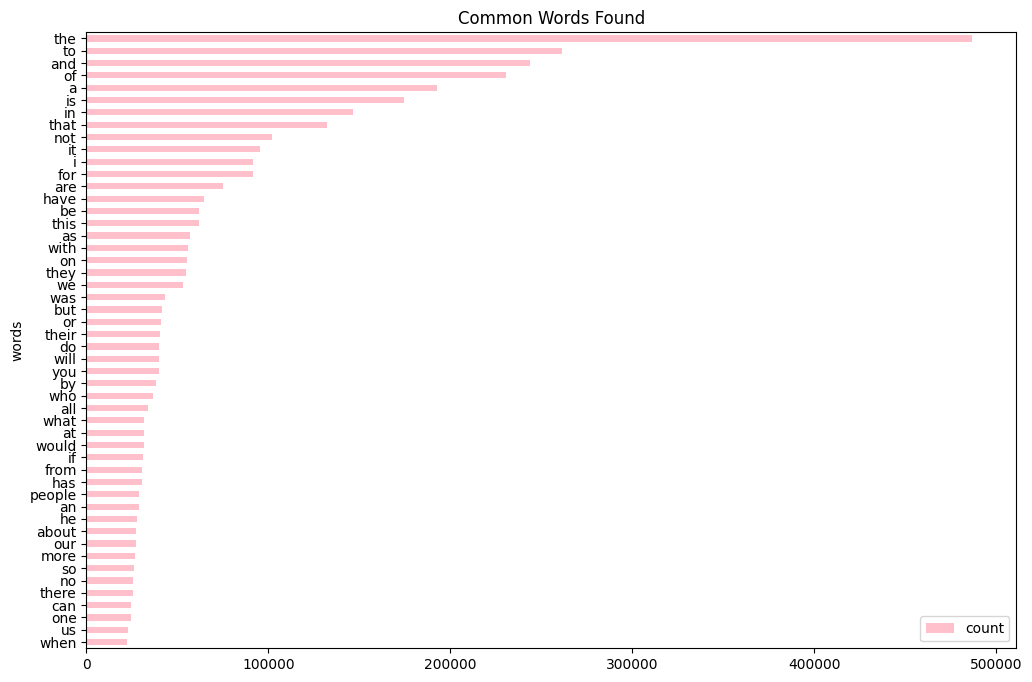

Processing Rows:   0%|          | 0/100585 [00:00<?, ?it/s]

    words  count
0  people  28008
1      us  21659
2  police  15004
3    time  13353
4   years  11360


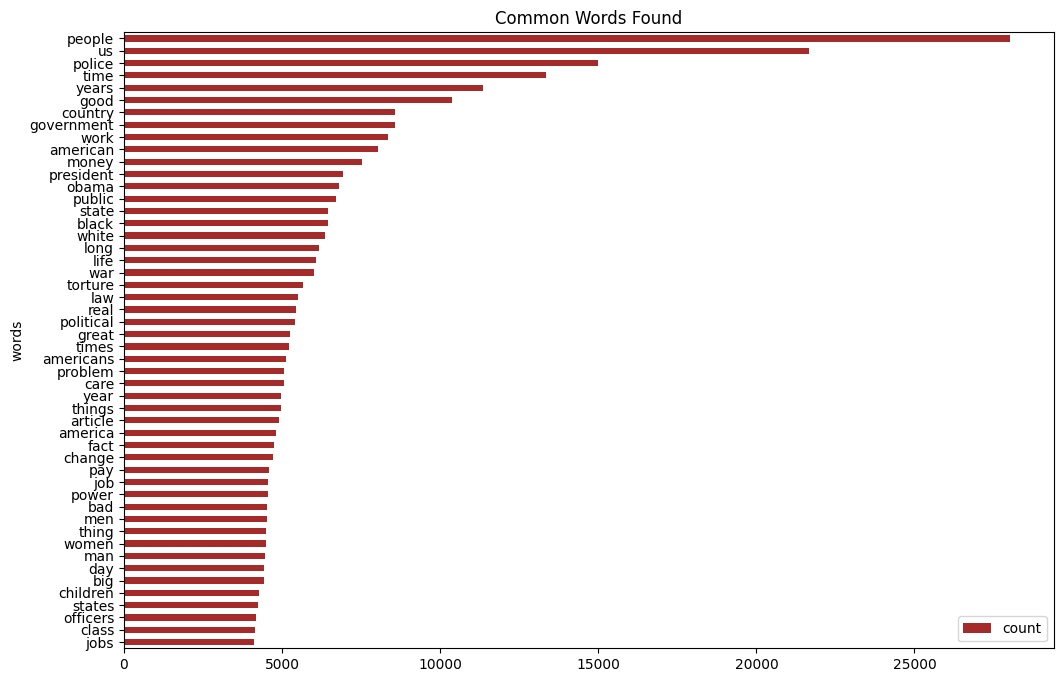

In [975]:
from tqdm.auto import tqdm
tqdm.pandas(desc = "Processing Rows")

def clear(string):
    punc = '''!()-[]{};'"\,<>./?@#$%^&*_~'''
    for ele in string:
        if ele in punc:
            string = string.replace(ele, "")
    return string


commentstring='| '.join(data1['commentBody'])
#freq = Counter(commentstring.split()).most_common()
#print(freq)

from collections import Counter
freq = Counter()
for commentstring in commentstring.split():
    freq[commentstring] += 1

#Create a frequency table
import pandas as pd
word_freq = pd.DataFrame(freq.most_common(50),
                             columns=['words', 'count'])
word_freq.head()
#Create the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")
ax.set_title("Common Words Found")
plt.show()

regexp = RegexpTokenizer('\w+')
data1['commentBody']=data1['commentBody'].apply(regexp.tokenize)

stopwords = stopwords.words("english")
my_stopwords=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", 
              "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", 
              "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", 
              "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", 
              "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", 
              "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", 
              "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", 
              "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", 
              "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", 
              "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", 
              "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", 
              "bi", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", 
              "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", 
              "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", 
              "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", 
              "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", 
              "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", 
              "described", "despite", "detail", "df", "di", "did", "didn", "didn't",'didnt', "different", "dj", "dk", "dl", "do", "does", 
              "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", 
              "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", 
              "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", 
              "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", 
              "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", 
              "fifth", "fify", "fill", "find", "first", "five", "fix", "fj", "fl", "fn", "fo", "following", "follows", "for", "former", 
              "formerly", "forth",  "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", 
              "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", 
              "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", 
              "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", 
              "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", 
              "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", 
              "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", 
              "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", 
              "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", 
              "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", 
              "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", 
              "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", 
              "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", 
              "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", 
              "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", 
              "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", 
              "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
              "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", 
              "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", 
              "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", 
              "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", 
              "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", 
              "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", 
              "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", 
              "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", 
              "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", 
              "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", 
              "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
              "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", 
              "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", 
              "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", 
              "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", 
              "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn",
              "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", 
              "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", 
              "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", 
              "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", 
              "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell",
              "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their",
              "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll",
              "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll",
              "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though",
              "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn",
              "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts",
              "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under",
              "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "use", "used", "useful",
              "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via",
              "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt",
              "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent",
              "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where",
              "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while",
              "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's",
              "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world",
              "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt",
              "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself",
              "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

stopwords.extend(my_stopwords)
data1["commentBody"] = data1["commentBody"].progress_apply(lambda x: " ".join([word for word in x if word not in stopwords]))




commentstring2='| ,'.join(map(str,data1['commentBody']))
freq2 = Counter(commentstring2.split()).most_common()
#print(freq2)

from collections import Counter
freq2 = Counter()
for commentstring2 in commentstring2.split():
    freq2[commentstring2] += 1

#Create a frequency table
import pandas as pd
word_freq2 = pd.DataFrame(freq2.most_common(50),
                             columns=['words', 'count'])
print(word_freq2.head())
#Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

In [976]:
len(data1)

100585

In [977]:
data1.head()

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title
0,20315259,19745324,great piece true terrific program pbs ancient ...,1478147045,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,
1,13720760,70660325,author tie bible view individualism point scri...,1420155846,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,
2,13714247,66677938,leftists deny totalitarian credentials embrace...,1420095887,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,
3,13629460,32642991,wow fierce libertarians statists battle commen...,1418991506,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,
4,13543313,16082307,discussions subject flawed understandings term...,1418143075,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,


## Creating Single Frequency Word List

In [978]:
def single_freq(temp_str):   
    str_list = temp_str.split()
    frequency = Counter(str_list)
    single_freq_words =[]
    for word in frequency:
        if frequency[word] == 1:
            single_freq_words.append(word)
    print("The total number of single frequency words are: ",len(single_freq_words))
    #print(single_freq_words)
    return single_freq_words
    
total_words_before_stem = data1['commentBody'].str.cat(sep=' ')
print(type(total_words_before_stem))
print("The total words in the corpus are: ",len(total_words_before_stem.split()))    
single_freq_words = single_freq(total_words_before_stem)

<class 'str'>
The total words in the corpus are:  3615850
The total number of single frequency words are:  125578


## Removing Single Frequency Words

In [979]:

data1["commentBody_processed"] = data1["commentBody"]
data1.head()

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,20315259,19745324,great piece true terrific program pbs ancient ...,1478147045,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,great piece true terrific program pbs ancient ...
1,13720760,70660325,author tie bible view individualism point scri...,1420155846,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,author tie bible view individualism point scri...
2,13714247,66677938,leftists deny totalitarian credentials embrace...,1420095887,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,leftists deny totalitarian credentials embrace...
3,13629460,32642991,wow fierce libertarians statists battle commen...,1418991506,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,wow fierce libertarians statists battle commen...
4,13543313,16082307,discussions subject flawed understandings term...,1418143075,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,discussions subject flawed understandings term...


In [980]:

total_words_before_stem = data1['commentBody_processed'].str.cat(sep=' ')
print(type(total_words_before_stem))
print("The total words in the corpus after single word removal are: ",len(total_words_before_stem.split()))    
single_freq_words = single_freq(total_words_before_stem)

<class 'str'>
The total words in the corpus after single word removal are:  3615850
The total number of single frequency words are:  125578


## Stemming the Comment_Body

In [981]:
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import WhitespaceTokenizer

englishStemmer=SnowballStemmer("english")
w_tokenizer = WhitespaceTokenizer()

data1['commentBody_processed'] = data1['commentBody_processed'].progress_apply(lambda x: [englishStemmer.stem(w) for w in w_tokenizer.tokenize(x)])
detokenizer = TreebankWordDetokenizer()
data1['commentBody_processed'] = data1['commentBody_processed'].progress_apply(lambda x: [detokenizer.detokenize(list(x))])
data1['commentBody_processed'] = data1['commentBody_processed'].str[0]
data1.head()


Processing Rows:   0%|          | 0/100585 [00:00<?, ?it/s]

Processing Rows:   0%|          | 0/100585 [00:00<?, ?it/s]

,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,20315259,19745324,great piece true terrific program pbs ancient ...,1478147045,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,great piec true terrif program pbs ancient gre...
1,13720760,70660325,author tie bible view individualism point scri...,1420155846,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,author tie bibl view individu point scriptur a...
2,13714247,66677938,leftists deny totalitarian credentials embrace...,1420095887,1,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,leftist deni totalitarian credenti embrac cite...
3,13629460,32642991,wow fierce libertarians statists battle commen...,1418991506,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,wow fierc libertarian statist battl commentari...
4,13543313,16082307,discussions subject flawed understandings term...,1418143075,0,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,discuss subject flaw understand term individu ...


In [982]:
total_words_after_stem = data1['commentBody_processed'].str.cat(sep=' ')
print(type(total_words_after_stem))
print("The total words in the corpus after single word removal and stemming are: ",len(total_words_after_stem.split()))

<class 'str'>
The total words in the corpus after single word removal and stemming are:  3615850


## Create 3 different dataframes for C, V and VC.

In [983]:
# The 3 different wordlists
vaccine_wordlist = ["booster","antibody","antigen","epidemic","herd immunity","injection","pcr","vax",
                    "jab","vaccine","immunity"]

covid_wordlist = ["Covid","corona","alpha","beta","gamma","delta","omicron","quarantine","pandemic","lockdown",
                  "herd immunity","CoV-2","n95","cov19","antibody","antigen","pcr","antiviral","comorbidity",
                  "myocarditis","shutdown","epidemic","face mask","ventilator" ,"community spread","symptomatic"]

common_wordlist = ["antibody","epidemic","herd immunity","pcr"]

In [984]:
# Stemmed wordlists
st_vaccine_wordlist = [englishStemmer.stem(word) for word in vaccine_wordlist]
print(st_vaccine_wordlist)

st_covid_wordlist = [englishStemmer.stem(word) for word in covid_wordlist]
print(st_covid_wordlist)

st_common_wordlist = [englishStemmer.stem(word) for word in common_wordlist]
print(st_common_wordlist)

['booster', 'antibodi', 'antigen', 'epidem', 'herd immun', 'inject', 'pcr', 'vax', 'jab', 'vaccin', 'immun']
['covid', 'corona', 'alpha', 'beta', 'gamma', 'delta', 'omicron', 'quarantin', 'pandem', 'lockdown', 'herd immun', 'cov-2', 'n95', 'cov19', 'antibodi', 'antigen', 'pcr', 'antivir', 'comorbid', 'myocard', 'shutdown', 'epidem', 'face mask', 'ventil', 'community spread', 'symptomat']
['antibodi', 'epidem', 'herd immun', 'pcr']


#### Vaccine_Data


In [985]:

data_vaccine = data1[data1['commentBody_processed'].str.contains('|'.join(st_vaccine_wordlist))].reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_vaccine))
data_vaccine.head()

The number of rows in vaccine data is 758


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,13465426,27650018,people issue litigation continuing steve jobss...,1417387447,46,1,False,https://www.nytimes.com/2014/12/01/technology/...,37,2014/12/01,technology,star witness in apple suit is steve jobs,peopl issu litig continu steve jobss death def...
1,13472002,65703212,science helps us puzzle connections science de...,1417462666,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,scienc help us puzzl connect scienc develop te...
2,13470345,3514151,video narrator social scientists identify fact...,1417444089,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,video narrat social scientist identifi factor ...
3,13469389,25688410,albert einstein nobel prize essence explaining...,1417437486,9,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,albert einstein nobel prize essenc explain pow...
4,13465905,66471578,scare vaccination fear unknown studies rats br...,1417411082,3,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,scare vaccin fear unknown studi rat bred cance...


#### Covid Data


In [986]:

data_covid = data1[data1['commentBody_processed'].str.contains('|'.join(st_covid_wordlist))].reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_covid))
data_covid.head()

The number of rows in vaccine data is 600


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,13473182,64791025,left wrong individualists horizontallysocial h...,1417474147,6,0,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,left wrong individualist horizontallysoci herd...
1,13471957,16271200,interpreting modern man society philosophic po...,1417456626,2,1,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,interpret modern man societi philosoph polit t...
2,13466070,57645792,knowledge human origins modern philosophers st...,1417399686,34,5,False,https://opinionator.blogs.nytimes.com/2014/11/...,332,2014/11/30,evolution-and-the-american-myth-of-the-individual,,knowledg human origin modern philosoph stone l...
3,13470345,3514151,video narrator social scientists identify fact...,1417444089,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,video narrat social scientist identifi factor ...
4,13466082,4735888,radiation atom bombs xray machines produce cal...,1417412735,10,2,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,radiat atom bomb xray machin produc call ioniz...


#### Covid + Vaccine Data



In [987]:
data_cv_1 = data1[data1['commentBody_processed'].str.contains('|'.join(st_common_wordlist))].reset_index(drop=True)
print("The number of rows in common data is",len(data_cv_1))
data_cv_1.head()

The number of rows in common data is 212


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,13470345,3514151,video narrator social scientists identify fact...,1417444089,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,video narrat social scientist identifi factor ...
1,13465313,61311780,understanding greater incidence testicular can...,1417386887,3,1,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,understand greater incid testicular cancer sta...
2,13466811,56767034,send chill white america pertains issue crime ...,1417435162,2,4,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,send chill white america pertain issu crime 86...
3,13465879,22234536,predict wisdom met wall denial people justify ...,1417423608,13,1,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,predict wisdom met wall denial peopl justifi i...
4,13465299,44287968,power lies word referring term austeritybrbrit...,1417408245,4,0,False,https://www.nytimes.com/2014/12/01/opinion/pau...,240,2014/12/01,opinion,paul krugman being bad europeans,power lie word refer term austeritybrbrit star...


In [988]:
data_cv_2 = data_vaccine[data_vaccine['commentBody_processed'].str.contains('|'.join(st_covid_wordlist))].reset_index(drop=True)
print("The number of rows in v+c data is",len(data_cv_2))
data_cv_2.head()

The number of rows in v+c data is 221


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,13470345,3514151,video narrator social scientists identify fact...,1417444089,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,video narrat social scientist identifi factor ...
1,13465313,61311780,understanding greater incidence testicular can...,1417386887,3,1,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,understand greater incid testicular cancer sta...
2,13466811,56767034,send chill white america pertains issue crime ...,1417435162,2,4,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,send chill white america pertain issu crime 86...
3,13465879,22234536,predict wisdom met wall denial people justify ...,1417423608,13,1,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,predict wisdom met wall denial peopl justifi i...
4,13465299,44287968,power lies word referring term austeritybrbrit...,1417408245,4,0,False,https://www.nytimes.com/2014/12/01/opinion/pau...,240,2014/12/01,opinion,paul krugman being bad europeans,power lie word refer term austeritybrbrit star...


In [989]:
data_cv = pd.concat([data_cv_1,data_cv_2]).drop_duplicates().reset_index(drop=True)
print("The number of rows in vaccine data is",len(data_cv))
data_cv.head()

The number of rows in vaccine data is 221


,commentID,userID,commentBody,approveDate,recommendations,replyCount,editorsSelection,article_url,comment_count,Date,Section,Title,commentBody_processed
0,13470345,3514151,video narrator social scientists identify fact...,1417444089,6,0,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,video narrat social scientist identifi factor ...
1,13465313,61311780,understanding greater incidence testicular can...,1417386887,3,1,False,https://www.nytimes.com/2014/12/01/health/long...,80,2014/12/01,health,long after an 80s scare suspicion of power lin...,understand greater incid testicular cancer sta...
2,13466811,56767034,send chill white america pertains issue crime ...,1417435162,2,4,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,send chill white america pertain issu crime 86...
3,13465879,22234536,predict wisdom met wall denial people justify ...,1417423608,13,1,False,https://www.nytimes.com/2014/12/01/opinion/cha...,311,2014/12/01,opinion,charles blow crime and punishment,predict wisdom met wall denial peopl justifi i...
4,13465299,44287968,power lies word referring term austeritybrbrit...,1417408245,4,0,False,https://www.nytimes.com/2014/12/01/opinion/pau...,240,2014/12/01,opinion,paul krugman being bad europeans,power lie word refer term austeritybrbrit star...


In [ ]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 5,top_n_words = 10)
headline_topics, _ = model.fit_transform(data_covid.commentBody_processed)
data1['commentBody_processed']


## Topic Modelling for Vaccine Data

In [990]:
import warnings
warnings.filterwarnings("ignore")

In [991]:
!pip3 install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [992]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 5, top_n_words = 10)
headline_topics, _ = model.fit_transform(data_vaccine.commentBody_processed)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2023-04-18 06:05:29,467 - BERTopic - Transformed documents to Embeddings
2023-04-18 06:05:37,444 - BERTopic - Reduced dimensionality
2023-04-18 06:05:37,475 - BERTopic - Clustered reduced embeddings


CPU times: user 59 s, sys: 2.04 s, total: 1min 1s
Wall time: 9.78 s


In [993]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(10)

Number of topics: 36


,Topic,Count,Name
0,-1,247,-1_peopl_immun_polic_us
1,0,36,0_ebola_virus_outbreak_epidem
2,1,35,1_tortur_cia_prosecut_immun
3,2,30,2_flu_vaccin_shot_year
4,3,26,3_polic_cop_mayor_union
5,4,26,4_pakistan_muslim_pakistani_islam
6,5,25,5_republican_auster_hillari_democrat
7,6,25,6_rape_women_campus_sexual
8,7,23,7_antibiot_bacteria_india_resist
9,8,23,8_food_sugar_obes_diabet


In [994]:
a = model.get_topic(freq.iloc[0]["Topic"])
print(a)

[('peopl', 0.012959331932186464), ('immun', 0.012843222552397107), ('polic', 0.010387773759170877), ('us', 0.008797352589103531), ('life', 0.0086324602456128), ('year', 0.008531757511239519), ('job', 0.008266319872741092), ('time', 0.008006086976041936), ('epidem', 0.007547334236654694), ('public', 0.0072799765943429955)]


In [995]:
##num_topics = len(freq)
#print(num_topics)
#for i in range(num_topics):
#  print("\nTopic ",i," :" ,model.get_topic(freq.iloc[i]["Topic"]))

In [996]:
#model.visualize_barchart(top_n_topics=num_topics,n_words=5)

In [997]:
#model.visualize_topics()

## Topic Modelling for Covid Data

In [998]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 5,top_n_words = 10)
headline_topics, _ = model.fit_transform(data_covid.commentBody_processed)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2023-04-18 06:05:39,305 - BERTopic - Transformed documents to Embeddings
2023-04-18 06:05:46,826 - BERTopic - Reduced dimensionality
2023-04-18 06:05:46,854 - BERTopic - Clustered reduced embeddings


CPU times: user 52.1 s, sys: 1.37 s, total: 53.5 s
Wall time: 8.22 s


In [999]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(10)

Number of topics: 22


,Topic,Count,Name
0,-1,121,-1_peopl_us_includ_nation
1,0,119,0_shutdown_republican_govern_bill
2,1,74,1_polic_black_white_gun
3,2,32,2_doctor_patient_treatment_medic
4,3,32,3_ebola_virus_africa_outbreak
5,4,30,4_rape_women_campus_sexual
6,5,20,5_school_fratern_colleg_time
7,6,20,6_india_antibiot_bacteria_hospit
8,7,18,7_food_diabet_sugar_diet
9,8,16,8_chines_tibetan_china_ccp


In [1000]:
a = model.get_topic(freq.iloc[0]["Topic"])
print(a)

[('peopl', 0.017688454793073915), ('us', 0.011869136507732895), ('includ', 0.01068808086893422), ('nation', 0.01050740806928864), ('epidem', 0.010446114061804205), ('care', 0.010382321209075906), ('dog', 0.010369006648766072), ('human', 0.00999823283268391), ('diseas', 0.009928047088412438), ('countri', 0.009879571202898741)]


In [1001]:
#num_topics = len(freq)
#print(num_topics)
#for i in range(num_topics):
#  print("\nTopic ",i," :" ,model.get_topic(freq.iloc[i]["Topic"]))

In [1002]:
#model.visualize_barchart(top_n_topics=num_topics)

In [1003]:
#model.visualize_topics()

## Topic Modelling for Covid + Vaccine Data

In [1004]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 3,top_n_words = 10)
headline_topics, _ = model.fit_transform(data_cv.commentBody_processed)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

2023-04-18 06:05:47,786 - BERTopic - Transformed documents to Embeddings
2023-04-18 06:05:50,230 - BERTopic - Reduced dimensionality
2023-04-18 06:05:50,244 - BERTopic - Clustered reduced embeddings


CPU times: user 6.36 s, sys: 61.3 ms, total: 6.42 s
Wall time: 2.96 s


In [1005]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(10)

Number of topics: 14


,Topic,Count,Name
0,-1,34,-1_fox_epidem_gun_peopl
1,0,36,0_black_polic_white_crime
2,1,28,1_ebola_virus_outbreak_epidem
3,2,25,2_rape_women_campus_sexual
4,3,20,3_sick_patient_diseas_mental
5,4,17,4_india_antibiot_bacteria_hospit
6,5,16,5_food_diabet_sugar_diet
7,6,12,6_gay_blood_hiv_test
8,7,8,7_auster_economi_adopt_republican
9,8,7,8_homeopathi_method_radioact_data


In [1006]:
a = model.get_topic(freq.iloc[0]["Topic"])
print(a)

[('fox', 0.02621902846070509), ('epidem', 0.026026721122143798), ('gun', 0.025402585863185896), ('peopl', 0.019419656621208793), ('children', 0.018872197245198435), ('countri', 0.018713875803648757), ('kill', 0.017658169163092454), ('public', 0.01736383228463725), ('year', 0.01705270626819383), ('diseas', 0.01657195139780596)]


In [1007]:
#num_topics = len(freq)
#print(num_topics)
#for i in range(num_topics):
#  print("\nTopic ",i," :" ,model.get_topic(freq.iloc[i]["Topic"]))

In [1008]:
#model.visualize_barchart(top_n_topics=num_topics)

In [1009]:
#model.visualize_topics()